importera bibliotek och ladda data

In [33]:
import pandas as pd
salaries_df = pd.read_csv('salaries.csv')
salaries_df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


ta bort kolumn salary med olika valutor och Salary_Currency

In [34]:
salaries_df=salaries_df.drop(columns=['salary'])
salaries_df=salaries_df.drop(columns=['salary_currency'])

Kolla efter saknade värden

In [35]:
salaries_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

kolla efter dubbletter

In [36]:
salaries_df.duplicated().sum()

np.int64(39139)

39124 rader är duplicerade. Jag vill kolla hur många rader det finns total i datasetet

In [37]:
salaries_df. shape

(73148, 9)

Delete duplicerade rader

In [38]:
salaries_df = salaries_df.drop_duplicates()

visa hur många rader som finns kvar efter att ha tagit bort

In [39]:
salaries_df.shape


(34009, 9)

spara rensade data

In [40]:
salaries_df.to_csv('rensade_salaries.csv', index=False)

Finns negativa löner?
Finns remote_ratio som är utanför 0-100?

In [52]:
negativa_lon = salaries_df[salaries_df['salary_in_usd'] < 0].shape[0]

if negativa_lon > 0:
    print(f"Det finns {negativa_lon} negativa löner i datan!")
else:
    print("✅ Inga negativa löner i datan!")
konstiga_remote = salaries_df[(salaries_df['remote_ratio'] < 0) | (salaries_df['remote_ratio'] > 100)].shape[0]

if konstiga_remote > 0:
    print(f"Det finns {konstiga_remote} konstiga remote_ratio i datan!")
else:
    print("✅ Alla remote_ratio ser bra ut!")

✅ Inga negativa löner i datan!
✅ Alla remote_ratio ser bra ut!


 Är alla nivåer av experience_level, employment_type, company_size rättstavade?

In [42]:
print(salaries_df['experience_level'].value_counts())
print(salaries_df['employment_type'].value_counts())
print(salaries_df['company_size'].value_counts())

experience_level
SE    18065
MI    10934
EN     3952
EX     1058
Name: count, dtype: int64
employment_type
FT    33706
PT      154
CT      133
FL       16
Name: count, dtype: int64
company_size
M    32695
L     1111
S      203
Name: count, dtype: int64


boxplot i lön att visa outliers

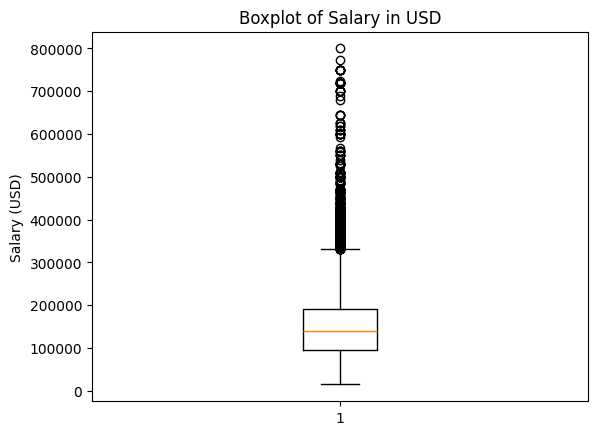

In [43]:
import matplotlib.pyplot as plt

plt.boxplot(salaries_df['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.ylabel('Salary (USD)')
plt.show()

Undersök varför det finns så många outliers

In [44]:
# 1. Välj höginkomsttagare (lön över 300 000 USD)
hog_lon = salaries_df[salaries_df['salary_in_usd'] > 300000]

# 2. Se fördelning av erfarenhetsnivå bland höginkomsttagare
print("Erfarenhetsnivå bland höginkomsttagare:")
print(hog_lon['experience_level'].value_counts())

# 3. Se de vanligaste jobbtitlarna bland höginkomsttagare
print("\nJobbtitlar bland höginkomsttagare:")
print(hog_lon['job_title'].value_counts().head(10))  # Visa topp 10 jobbtitlar
# 4. Se de företagstorlek bland höginkomsttagare
print("\nföretagstorlek bland höginkomsttagare:")
print(hog_lon['company_size'].value_counts().head(10))
# 5. Se de företagsland bland höginkomsttagare
print("\nföretagsland bland höginkomsttagare:")
print(hog_lon['company_location'].value_counts().head(10))


Erfarenhetsnivå bland höginkomsttagare:
experience_level
SE    810
MI    308
EX    110
EN     24
Name: count, dtype: int64

Jobbtitlar bland höginkomsttagare:
job_title
Machine Learning Engineer    153
Software Engineer            149
Data Scientist               129
Engineer                     104
Data Engineer                 89
Research Scientist            77
Manager                       75
Research Engineer             59
Engineering Manager           55
Product Manager               42
Name: count, dtype: int64

företagstorlek bland höginkomsttagare:
company_size
M    1228
L      23
S       1
Name: count, dtype: int64

företagsland bland höginkomsttagare:
company_location
US    1191
GB      31
CA      19
CZ       3
DE       2
MX       2
AU       1
LT       1
CH       1
IL       1
Name: count, dtype: int64


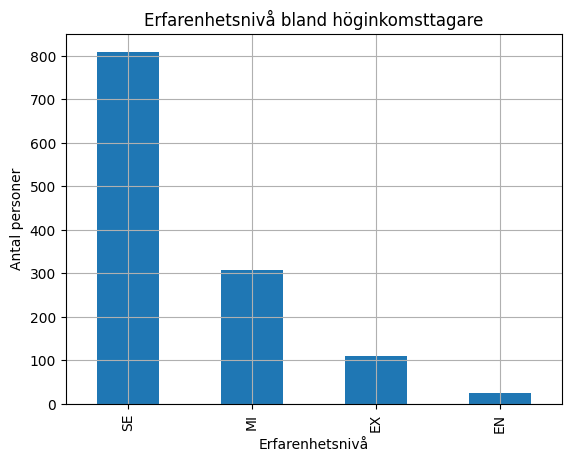

In [45]:
import matplotlib.pyplot as plt

# Rita stapeldiagram för erfarenhetsnivå
hog_lon['experience_level'].value_counts().plot(kind='bar')
plt.title('Erfarenhetsnivå bland höginkomsttagare')
plt.xlabel('Erfarenhetsnivå')
plt.ylabel('Antal personer')
plt.grid(True)
plt.show()

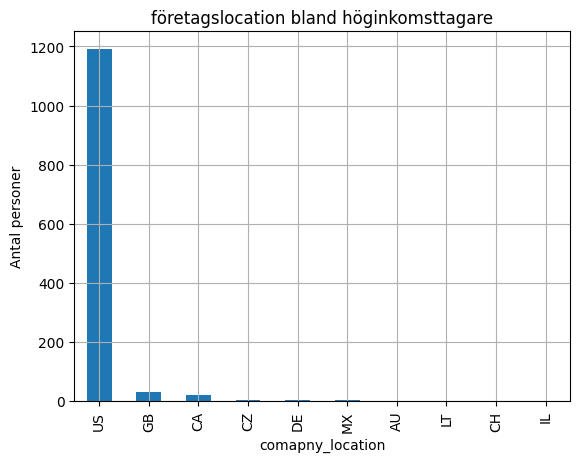

In [46]:
import matplotlib.pyplot as plt

# Rita stapeldiagram för företagsl
hog_lon['company_location'].value_counts().plot(kind='bar')
plt.title('företagslocation bland höginkomsttagare')
plt.xlabel('comapny_location')
plt.ylabel('Antal personer')
plt.grid(True)
plt.show()

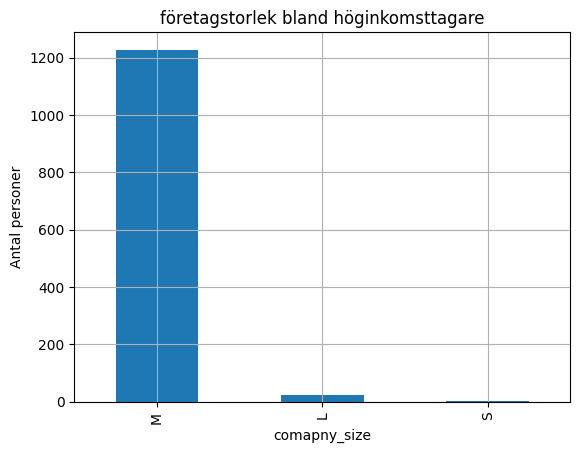

In [47]:
import matplotlib.pyplot as plt

# Rita stapeldiagram för företagstorlek
hog_lon['company_size'].value_counts().plot(kind='bar')
plt.title('företagstorlek bland höginkomsttagare')
plt.xlabel('comapny_size')
plt.ylabel('Antal personer')
plt.grid(True)
plt.show()

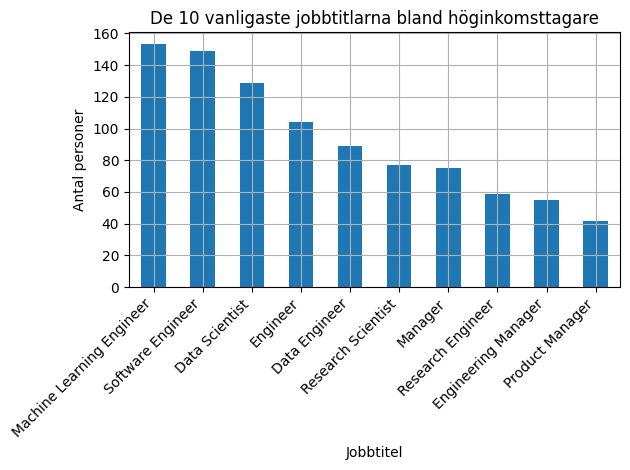

In [48]:
import matplotlib.pyplot as plt

# Visa de 10 vanligaste jobbtitlarna bland höginkomsttagare
hog_lon['job_title'].value_counts().head(10).plot(kind='bar')

plt.title('De 10 vanligaste jobbtitlarna bland höginkomsttagare')
plt.xlabel('Jobbtitel')
plt.ylabel('Antal personer')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # (valfritt) rotera etiketter så de syns bättre
plt.tight_layout()  # (valfritt) undvik att texten klipps
plt.show()

Hitta topp 10 vanligaste jobbtitlar

In [49]:
# Hitta topp 10 vanligaste jobbtitlar
top10_titles = salaries_df['job_title'].value_counts().head(10).index

# Skapa en ny kolumn där bara topp 10 behålls, resten blir 'Other'
salaries_df['job_title_simplified'] = salaries_df['job_title'].apply(
    lambda x: x if x in top10_titles else 'Other'
)
# Se hur nya 'job_title_simplified' ser ut
salaries_df['job_title_simplified'].value_counts()

job_title_simplified
Other                        12480
Data Scientist                4312
Data Engineer                 4008
Data Analyst                  3454
Software Engineer             2158
Machine Learning Engineer     2130
Engineer                      1725
Manager                       1326
Research Scientist             857
Analyst                        831
Analytics Engineer             728
Name: count, dtype: int64

In [50]:
data_encoded = pd.get_dummies(
    salaries_df,
    columns=['experience_level', 'employment_type', 'company_size', 'job_title_simplified']
)
for col in data_encoded.columns:
    print(col)

work_year
job_title
salary_in_usd
employee_residence
remote_ratio
company_location
experience_level_EN
experience_level_EX
experience_level_MI
experience_level_SE
employment_type_CT
employment_type_FL
employment_type_FT
employment_type_PT
company_size_L
company_size_M
company_size_S
job_title_simplified_Analyst
job_title_simplified_Analytics Engineer
job_title_simplified_Data Analyst
job_title_simplified_Data Engineer
job_title_simplified_Data Scientist
job_title_simplified_Engineer
job_title_simplified_Machine Learning Engineer
job_title_simplified_Manager
job_title_simplified_Other
job_title_simplified_Research Scientist
job_title_simplified_Software Engineer


In [51]:
for col in data_encoded.columns:
    if data_encoded[col].dtype == bool:
        data_encoded[col] = data_encoded[col].astype(int)
data_encoded.to_csv('salaries_encoded.csv', index=False)